In [1]:
import jax.numpy as jnp
from jax import grad,vmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

/home/kawahara/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#sample utility function
def u(x):
    return x**0.5

In [3]:
def ARA(xarr):
    den=vmap(grad(grad(u)))
    bun=vmap(grad(u))
    return -den(xarr)/bun(xarr)

In [4]:
def RRA(xarr):
    den=vmap(grad(grad(u)))
    bun=vmap(grad(u))
    return -den(xarr)/bun(xarr)*xarr

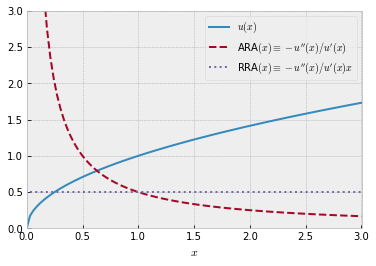

In [5]:
x_=jnp.linspace(0,3,100)
plt.plot(x_,u(x_),label="$u(x)$")
plt.plot(x_,ARA(x_),label="ARA$(x) \equiv - u^{\prime\prime}(x)/u^\prime (x)$",ls="dashed")
plt.plot(x_,RRA(x_),label="RRA$(x) \equiv - u^{\prime\prime}(x)/u^\prime (x) x$",ls="dotted")
plt.legend()
plt.xlabel("$x$")
plt.xlim(0.,3.0)
plt.ylim(0,3)
plt.savefig("autograd3.pdf")